# PCA or SVD or LSA or LSI and NMF

or

# Matrix Factorization and its Applications

- PCA
- SVD
- LSI
- LSA

![](http://m.memegen.com/l4syl9.jpg)


Relax!

Its all just Decomposition

### PCA 

is just SVD on a covariance matrix

infact, it is often easier to compute SVD than a large covariance matrix. so some computer solvers just do SVD first

$$Cov(X) = X^TX$$

$$X = U\Sigma V^T$$

$$Cov(X) = Cov(U\Sigma V^T)$$

$$X^TX = U\Sigma V^T V \Sigma U^T$$  but $$V^T V = I$$

So $$X^TX = U\Sigma^2 U^T$$

### LSA

Latent Semantic Analysis is just SVD applied to a word/document matrix

- D1 = "I like databases"
- D2 = "I hate databases"

then the document-term matrix would be:

$$ \begin{matrix} 1 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1  \end{matrix} $$

With each row being a different document
and each column being a new word

In this case our decomposition has a new interpretation:
- $\Sigma$ are the importances of each of our topics
- $U$ is a transform from a word vector to the topics that word is most used in
- $V$ is transform from each document to the topics it is about

### EigenFaces

If SVD is applied to a bunch of face shots, we get eigenfaces. Which look creepy, but are really useful for facial detection.

![](http://archive.cnx.org/resources/28b7669c052b1d7ec07962bb69aa5cc3733eb868/PCA_Face.png)


### Recommendation systems

Recommendation systems can be thought of as applying SVD to an User/Item matrix

In this case our decomposition has a new interpretation:
- $\Sigma$ are the importances of each of our latent
- $U$ is a transform from a persons buying habits/reviews to the latent features that represent thier preferences
- $V$ is transform from the list of people who like this, to the latent features

By setting a large number of our singular values to 0, and reconstructing the original matrix, we will gain an estimate of how much each user will like each item.

### PageRank

PageRank can also be thought of as a similar use of this concept. 

PageRank is SVD on a markov chain.

Any markov chain can be expressed as a matrix from starting state -> ending state

This matrix has the property that each column will sum to 1. Because of that, we know that the largest Eigen value will be 1. We can truncate all the rest

- $\Sigma = \begin{bmatrix}1 & 0 & \cdots & 0 \\0 & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & 0 \\ 0 &0 & 0 & 0 \end{bmatrix}$
- $U$ is can be thought of as the distribution of states after the system has fallen into equilibrium

in the case of trust systems like page links or skill endorsements this can be thought of as a representation of who has the most trust.

In traffic flows this could be the proper number of uhaul trucks to put in each city, or citibikes to put at each station

### Word2Vec or GloVe

[In this paper](https://levyomer.files.wordpress.com/2014/09/neural-word-embeddings-as-implicit-matrix-factorization.pdf) it was shown that word2vec is actually implicitly doing a matrix decomposition.

The word2vec implimentation is doing a single hidden layer Neural network. But since each layer transformation can be thought of as a decomposition into two weights matrix.

Word2vec is implicitly solving a SVD on 'Pointwise Mutual Information' matrix, between the word and the other words in the its context.

In this case our decomposition has the interpretation:
- $\Sigma$ the importance of each word embedding dimension. in practice, this is usually merged with U
- $U$ is the transform between each word and the word embedding dimension

In [1]:
%pylab inline
import numpy 
import matplotlib.pyplot as plt
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
example = ['Football baseball basketball',
            'baseball giants cubs redsox',
            'football broncos cowboys',
            'baseball redsox tigers',
            'pop stars hendrix prince',
            'hendrix prince jagger rock',
            'joplin pearl jam tupac rock',
          ]

# example = ["Machine learning is super fun", 
#            "Python is super, super cool",
#             "Statistics is cool, too",
#             "Data science is fun",
#             "Python is great for machine learning",
#             "Python is effective for data science",
#             "I like football",
#             "Football is great to watch"]

In [3]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example) 
pd.DataFrame(dtm.toarray(), index=example, columns=vectorizer.get_feature_names()).head(10)

,baseball,basketball,broncos,cowboys,cubs,football,giants,hendrix,jagger,jam,joplin,pearl,pop,prince,redsox,rock,stars,tigers,tupac
Football baseball basketball,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
baseball giants cubs redsox,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
football broncos cowboys,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
baseball redsox tigers,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
pop stars hendrix prince,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
hendrix prince jagger rock,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
joplin pearl jam tupac rock,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1


Each row represents a document. Each column represents a word. Each entry equals the number of times the word appears in the document
￼￼
Note: order and proximity of words in documents is NOT accounted for. Called a "bag of words" representation.

In [4]:
# Get words that correspond to each column 
vectorizer.get_feature_names()

['baseball',
 'basketball',
 'broncos',
 'cowboys',
 'cubs',
 'football',
 'giants',
 'hendrix',
 'jagger',
 'jam',
 'joplin',
 'pearl',
 'pop',
 'prince',
 'redsox',
 'rock',
 'stars',
 'tigers',
 'tupac']

In [5]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [6]:
lsa.explained_variance_ratio_

array([ 0.18507786,  0.16452307])

In [7]:
pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,baseball,basketball,broncos,cowboys,cubs,football,giants,hendrix,jagger,jam,joplin,pearl,pop,prince,redsox,rock,stars,tigers,tupac
component_1,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.48794,0.26572,0.19097,0.19097,0.19097,0.22223,0.48794,-0.00000,0.45669,0.22223,-0.00000,0.19097
component_2,0.67504,0.17189,0.05312,0.05312,0.27813,0.22501,0.27813,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50314,0.00000,0.00000,0.22501,0.00000


In [8]:
array(vectorizer.get_feature_names())

array(['baseball', 'basketball', 'broncos', 'cowboys', 'cubs', 'football',
       'giants', 'hendrix', 'jagger', 'jam', 'joplin', 'pearl', 'pop',
       'prince', 'redsox', 'rock', 'stars', 'tigers', 'tupac'], 
      dtype='<U10')

Each document is a linear combination of the LSA components

In [9]:
pd.DataFrame(dtm_lsa.round(5), index = example, columns = ["component_1","component_2" ])
#pd.DataFrame(dtm_lsa.round(5), index = range(6), columns = ["component_1","component_2" ])

,component_1,component_2
Football baseball basketball,-0.0,1.0
baseball giants cubs redsox,-0.0,1.0
football broncos cowboys,-0.0,1.0
baseball redsox tigers,-0.0,1.0
pop stars hendrix prince,1.0,0.0
hendrix prince jagger rock,1.0,0.0
joplin pearl jam tupac rock,1.0,0.0


In [10]:
[[example[i], dtm_lsa[i][0].round(5), dtm_lsa[i][1].round(5)] for i in range(len(example))]

[['Football baseball basketball', -0.0, 1.0],
 ['baseball giants cubs redsox', -0.0, 1.0],
 ['football broncos cowboys', -0.0, 1.0],
 ['baseball redsox tigers', -0.0, 1.0],
 ['pop stars hendrix prince', 1.0, 0.0],
 ['hendrix prince jagger rock', 1.0, 0.0],
 ['joplin pearl jam tupac rock', 1.0, 0.0]]

In [11]:
xs = [w[0].round(5) for w in dtm_lsa] 
ys = [w[1].round(5) for w in dtm_lsa]
c_[xs, ys]

array([[-0.,  1.],
       [-0.,  1.],
       [-0.,  1.],
       [-0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

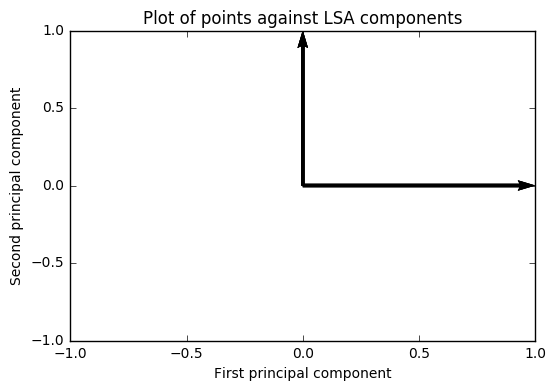

In [12]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()

We have reduced dimension to 2-dim (and have lost some info)
Similar docs point in similar directions. Dissimilar docs have perpendicular (orthogonal) vectors. "Cosine similarity"
Can use cosine similarity for search: which doc has the smallest angle with search term?

Document similarity using LSA

In [13]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity.round(6),index=(range(7)), columns=(range(7))).head(10)

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-0.0,-0.0,-0.0
1,1.0,1.0,1.0,1.0,-0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,-0.0,-0.0,-0.0
3,1.0,1.0,1.0,1.0,-0.0,0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,1.0,1.0,1.0
5,-0.0,0.0,-0.0,0.0,1.0,1.0,1.0
6,-0.0,0.0,-0.0,0.0,1.0,1.0,1.0


In [14]:
numpy.asmatrix(dtm_lsa)

matrix([[ -2.12508405e-15,   1.00000000e+00],
        [ -1.45730976e-15,   1.00000000e+00],
        [ -2.36249501e-15,   1.00000000e+00],
        [ -1.58136132e-15,   1.00000000e+00],
        [  1.00000000e+00,   1.38354365e-15],
        [  1.00000000e+00,   1.71178711e-15],
        [  1.00000000e+00,   1.99598585e-15]])

# NMF

Finally something that isn't just SVD

But its still just decomposition

![](https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png)

The decomposition is just two matrices, but we can still think about something like our eigen values, just eaten up by one of the matrices.

$$V = WH $$

a similar process to SVD happens, but we are under the constraint that we may not have negative values in this matrix

SVD decomposes a matrix into many components, but most the time the results are hard to interpret.
![](http://archive.cnx.org/resources/28b7669c052b1d7ec07962bb69aa5cc3733eb868/PCA_Face.png)

![](http://archive.cnx.org/resources/86d95a5d66974426fb30f0ab24d91bd901dbbc83/NMF_Face.png)

Since NMF can never undo the application of a latent feature, it is much more careful about what it adds at each step. In some applications, this can make for more human interpretable latent features.

In [15]:
from sklearn.decomposition import NMF

nmf_model = NMF(2)

dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [16]:
dtm.shape

(7, 19)

In [17]:
dtm_nmf.round(2)

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [18]:
nmf_model.components_[:,:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.06673582,  0.27163788,  0.08394072,  0.08394072,  0.43951933]])

In [19]:
np.dot(dtm_nmf,nmf_model.components_).round(2)[0,370:380]

array([], dtype=float64)

In [20]:
print(dtm)

  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1
  (1, 14)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (3, 0)	1
  (3, 14)	1
  (3, 17)	1
  (4, 7)	1
  (4, 12)	1
  (4, 13)	1
  (4, 16)	1
  (5, 7)	1
  (5, 8)	1
  (5, 13)	1
  (5, 15)	1
  (6, 9)	1
  (6, 10)	1
  (6, 11)	1
  (6, 15)	1
  (6, 18)	1


In [21]:
example = ['Hamilton brought a boost. The Lion King provided ballast. And Broadway, once again, broke a record: The theater season that just ended attracted more people, and more money, than any before. Broadway seems to be defying the cultural odds: An ancient art form in the digital age, it is strengthening thanks to an everincreasing influx of tourists and a resurgent enthusiasm for musical theater. The season that ended on Sunday included 13,317,980 visitors to Broadway shows  a record number, up 1.6 percent over the previous season, according to figures released on Monday by the Broadway League. Theaters grossed 1.373 billion, also a record, up 0.6 percent over the previous season, although the grosses are not adjusted for inflation. Once again, Simba ruled supreme: The Lion King, still mighty more than 18 years after it opened, grossed 102.7 million on Broadway last season, far outpacing any other show. The musical, which has multiple productions running simultaneously around the globe, has grossed more than 6.2 billion worldwide, and has been seen by 85 million people over its history, according to Disney; by contrast, 478,605 people have seen the Broadway production of Hamilton thus far.Hamilton (featuring a onetime Simba, Christopher Jackson, in the role of George Washington) offered an enormous jolt of energy to the Broadway season. This hiphop musical about Americas founding fathers has dominated the cultural conversation, raked in awards and been celebrated at the White House. Many Broadway leaders believe the show has helped the industry as a whole, bringing attention from corners of the culture that have long preferred to mock jazz hands and dream ballets.',
          'When Candace Payne, aka the Chewbacca Mask Mom, sat in her car last Thursday filming her new Hasbro toy, an electronic Chewbacca Mask from Kohls, she inadvertently made history  not just for Facebook Live as its most popular video, but for the entire haul and unboxing video genre. Paynes video starts out like every other video in the genre  she talks about her shopping trip, and is incredibly excited to show the viewer her new purchase   but after that, the similarities stop. Shes not in a bedroom, but in her car, and Payne isnt describing multiple purchases, just one. The platform, execution and reception of her vlog has impacted the genre, in quite a few ways. First, Paynes video actually went viral among ordinary people, something that doesnt really happen to other haul and unboxing videos  not to this extent. While it is true boxing and haul videos by top YouTube vloggers will get a few million views (only!) thanks to the large communities said vlogger has built over the years, no one has ever seen an instant worldwide smash hit like Paynes video. Grandparents and aunts that dont even know what a haul video is were watching, liking, and sharing Paynes video.',
          'LOS ANGELES (AP)  An original animators desk from Walt Disney Studios and a vintage Mickey Mouse doll signed by Walt Disney are among the items up for bid next month in an online auction of rare Disney memorabilia. The website of Van Eaton Galleries lists more than 700 items for sale. Among the items listed are original production cels for Disney classics like The Jungle Book, Sleeping Beauty, Bambi and Snow White and the Seven Dwarfs. Collectors can also bid on costumes from the original Mickey Mouse Club, including one worn by Annette Funicello. An exhibition titled, Collecting Disney, opens Wednesday at the gallery in Sherman Oaks, California, ahead of the online auction that begins June 18.',
          'After putting together one of their best playoff performances in a must win Game 3 on Saturday, the Toronto Raptors picked up where they left off in Mondays Game 4, with AllStar guards Kyle Lowry and DeMar DeRozan finally teaming up for a complete performance. Lowry (35 points) and DeRozan (32 points) shot a combined 28 for 43 for 67 points and became the first teammates in a conference finals series to score 30  plus points on 60% or better shooting since Charles Barkley and Dan Majerle for Phoenix Suns in 1993, further proving that when the starting backcourt is on, the Raptors are extremely difficult to beat. Those numbers are of stark contrast to the majority of the Raptors first two playoff series, where both Lowry and DeRozan struggled mightily to deliver significant offensive production.',
          'The Cleveland Cavaliers enjoyed one of their most devastating 12 minutes of offensive basketball in the second half Monday night and, considering their playoff run, thats saying something. But it came after a long stretch of some of their most puzzling play in weeks, and that cost them a valuable playoff game. The Toronto Raptors evened the Eastern Conference finals at 22 with a 10599 victory after holding on in the face of a vicious Cavs late rally. Yet, as well as the Raptors played  stars Kyle Lowry and DeMar DeRozan were just terrific with a combined 67 points, the most theyve ever scored as teammates  it really came amid some headscratching, gameplan adjustments by coach Tyronn Lue. After spending the past few weeks finding a rhythm that has produced mostly spectacular results, Lue completely changed his rotations in the first half in what seemed like an overreaction from the Game 3 loss.',
          'Leave it to Rich Hill to end the As four game losing streak. The last time Oakland had won before Monday, Hill was on the mound. And at Safeco Field, he was magnificent, working calmly and efficiently whether the bases were empty or full. Hill pitched eight scoreless innings to help the As top the division leading Mariners 5 0. The As have won all four games theyve played at Seattle this season. Oakland has 20 wins and Hill has seven of them, the most for an As pitcher before the end of May since Mark Mulder had eight in 2003, a year Mulder made the All Star team. Every game he goes out there we feel were going to win, no matter what were going through, Oakland manager Bob Melvin said. He brings a lot of intensity to the mound, a lot of fight. Hill hasnt allowed more than three earned runs in any of his 10 starts and his ERA is down to 2.18. He also became the first As starter to pitch into the eighth inning since Sonny Gray pitched eight innings last Aug. 22, a span of 83 games; Melvin said his plan was to use only Hill and closer Ryan Madson, and Hill even wanted to go back out for the ninth after throwing 107 pitches. Hills streak of starts in which he gave up no more than four hits while working at least five innings ended at six; the Mariners recorded eight hits off him, few of them struck well. Hills streak was the best in franchise history dating to at least 1913. Seattle loaded the bases with no outs in the second inning without hitting the ball hard, with Nelson Cruzs infield single, an opposite field flare by Dae Ho Lee and a bloop to center by Kyle Seager. At that point, Hill said, second baseman Chris Coghlan came over to him and said, Control what you can control.']

In [22]:
example

['Hamilton brought a boost. The Lion King provided ballast. And Broadway, once again, broke a record: The theater season that just ended attracted more people, and more money, than any before. Broadway seems to be defying the cultural odds: An ancient art form in the digital age, it is strengthening thanks to an everincreasing influx of tourists and a resurgent enthusiasm for musical theater. The season that ended on Sunday included 13,317,980 visitors to Broadway shows  a record number, up 1.6 percent over the previous season, according to figures released on Monday by the Broadway League. Theaters grossed 1.373 billion, also a record, up 0.6 percent over the previous season, although the grosses are not adjusted for inflation. Once again, Simba ruled supreme: The Lion King, still mighty more than 18 years after it opened, grossed 102.7 million on Broadway last season, far outpacing any other show. The musical, which has multiple productions running simultaneously around the globe, ha

In [23]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example) 

In [24]:
# Get words that correspond to each column 
vectorizer.get_feature_names()

['10',
 '102',
 '10599',
 '107',
 '12',
 '13',
 '18',
 '1913',
 '1993',
 '20',
 '2003',
 '22',
 '28',
 '30',
 '317',
 '32',
 '35',
 '373',
 '43',
 '478',
 '60',
 '605',
 '67',
 '700',
 '83',
 '85',
 '980',
 'according',
 'actually',
 'adjusted',
 'adjustments',
 'age',
 'ahead',
 'aka',
 'allowed',
 'allstar',
 'americas',
 'amid',
 'ancient',
 'angeles',
 'animators',
 'annette',
 'ap',
 'art',
 'attention',
 'attracted',
 'auction',
 'aug',
 'aunts',
 'awards',
 'backcourt',
 'ball',
 'ballast',
 'ballets',
 'bambi',
 'barkley',
 'baseman',
 'bases',
 'basketball',
 'beat',
 'beauty',
 'bedroom',
 'begins',
 'believe',
 'best',
 'better',
 'bid',
 'billion',
 'bloop',
 'bob',
 'book',
 'boost',
 'boxing',
 'bringing',
 'brings',
 'broadway',
 'broke',
 'brought',
 'built',
 'california',
 'calmly',
 'came',
 'candace',
 'car',
 'cavaliers',
 'cavs',
 'celebrated',
 'cels',
 'center',
 'changed',
 'charles',
 'chewbacca',
 'chris',
 'christopher',
 'classics',
 'cleveland',
 'closer',

In [25]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(5, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


In [26]:
lsa.explained_variance_ratio_

array([ 0.18399911,  0.30056967,  0.21181058,  0.1080459 ,  0.11751177])

In [27]:
dtm.shape

(6, 468)

In [28]:
numpy.asmatrix(dtm_lsa)

matrix([[ 0.85140078, -0.50627176, -0.13390262, -0.01074352, -0.02757313],
        [ 0.20683299, -0.02000416,  0.97782726, -0.02426598, -0.00921748],
        [ 0.07048233, -0.02342286,  0.00840211,  0.06666797,  0.99497156],
        [ 0.07010195,  0.07540362,  0.00223501,  0.99286991, -0.06003629],
        [ 0.12906207,  0.13508687,  0.05990665,  0.97878137, -0.05909951],
        [ 0.53324685,  0.84083311, -0.06823058, -0.06314268, -0.00225258]])

Since NMF is dealing with an extra constraint, it will tend to lose more information, when trunctating. 

also, nmf is not required to give you orthogonal latent vectors

![](https://qph.ec.quoracdn.net/main-qimg-9b4e31ec4b57f4baf7d08d5df17c6bc0?convert_to_webp=true)